<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/03_Convolutional_Neural_Network_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import pathlib

## Get the data
**Data is available from Food101 dataset available on kaggle which is pre-processed after dowloading**

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-23 18:40:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.207, 108.177.120.207, 173.194.206.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  61.8MB/s    in 1.7s    

2024-02-23 18:40:17 (61.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Visualize the image data

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [4]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [5]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape {img.shape}")
  return img

Image shape (512, 384, 3)


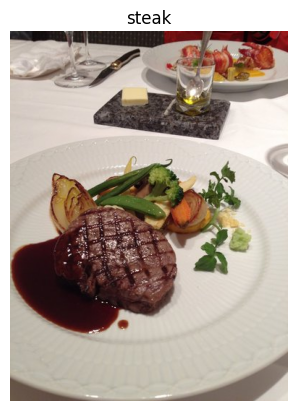

In [6]:
image = view_random_image("pizza_steak/train/", "steak")

In [ ]:
image.shape

(512, 384, 3)

## Tiny VGG Model
1. Data Preprocessing
2. Create VGG model
3. Compile VGG model
4. Fit VGG model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (Tiny VGG)
vgg_model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])


# Compile the model
vgg_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Fit the model
history_1 = vgg_model_1.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 168ms/step - loss: 0.5943 - accuracy: 0.6747 - val_loss: 0.4212 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 7s 159ms/step - loss: 0.4517 - accuracy: 0.8007 - val_loss: 0.3816 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 11s 246ms/step - loss: 0.4219 - accuracy: 0.8173 - val_loss: 0.3551 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3725 - accuracy: 0.8420 - val_loss: 0.3841 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3299 - accuracy: 0.8647 - val_loss: 0.3525 - val_accuracy: 0.8440


In [ ]:
vgg_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the non CNN model 1

In [ ]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(train_data, epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 135ms/step - loss: 0.7708 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 4)                 602116    
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Using the non CNN model 2
model_2 isn't performing too well so trying to change model a bit to see if it can learn the patterns in the image data

In [ ]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/10
47/47 [==============================] - 10s 148ms/step - loss: 1.0640 - accuracy: 0.6373 - val_loss: 0.5712 - val_accuracy: 0.7640
Epoch 2/10
47/47 [==============================] - 6s 136ms/step - loss: 0.5916 - accuracy: 0.7453 - val_loss: 0.6906 - val_accuracy: 0.5120
Epoch 3/10
47/47 [==============================] - 6s 121ms/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6562 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 7s 145ms/step - loss: 0.6898 - accuracy: 0.5087 - val_loss: 0.6191 - val_accuracy: 0.6600
Epoch 5/10
47/47 [==============================] - 9s 199ms/step - loss: 0.5927 - accuracy: 0.7107 - val_loss: 0.5618 - val_accuracy: 0.7620
Epoch 6/10
47/47 [==============================] - 8s 170ms/step - loss: 0.5694 - accuracy: 0.7373 - val_loss: 0.6286 - val_accuracy: 0.6460
Epoch 7/10
47/47 [==============================] - 7s 143ms/step - loss: 0.5621 - accuracy: 0.7573 - val_loss: 0.5645 - val_accuracy: 0.7760
Epoch

In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_17 (Dense)            (None, 20)                3010580   
                                                                 
 dense_18 (Dense)            (None, 10)                210       
                                                                 
 dense_19 (Dense)            (None, 5)                 55        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 3010851 (11.49 MB)
Trainable params: 3010851 (11.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## NOTE
1. Convolutional architecture has less number of parameters and still performs better than model_2 and model_3 of dense network

# Binary classification

1. Become one with data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Compile a model
5. Fit the model
6. Evaluate the model
7. Adjust hyperparameter and tweak model
8. Repeat until satisfied

## 1. Become one with data

Image shape (382, 512, 3)
Image shape (512, 512, 3)


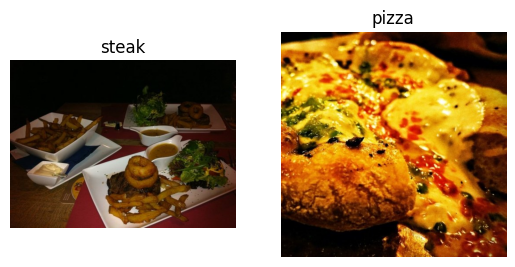

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data

In [7]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [8]:
# Create train and test data generators
# Efficient way to load data into memory
# ImageDataGenerator also has data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## 3. Train the model

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPool2D
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Compile the model

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

## 5. Fit the model

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 160ms/step - loss: 0.8905 - accuracy: 0.6000 - val_loss: 0.5882 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4789 - accuracy: 0.7860 - val_loss: 0.5201 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.2950 - accuracy: 0.8873 - val_loss: 0.3913 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.1422 - accuracy: 0.9567 - val_loss: 0.4878 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.0593 - accuracy: 0.9873 - val_loss: 0.6395 - val_accuracy: 0.7520


## 6. Evaluate the model

<Axes: >

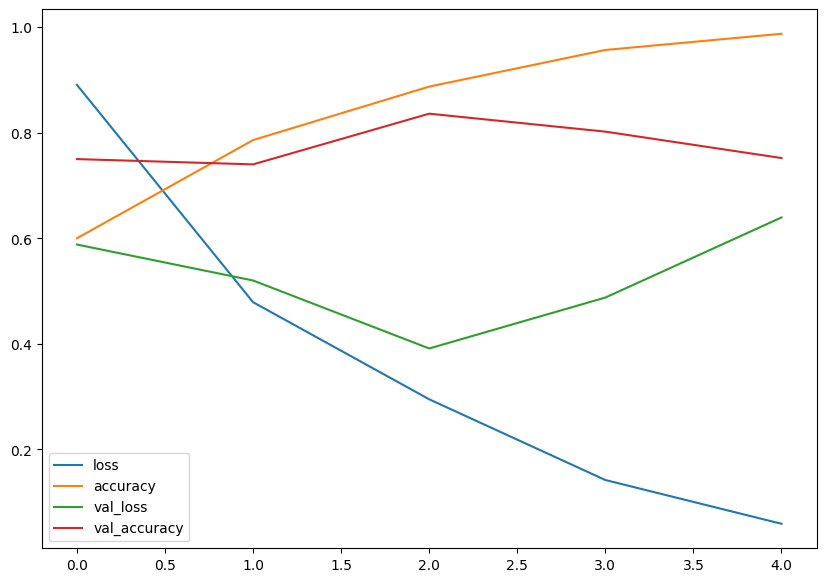

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

## Adjust model parameters


* Max pooling reduce the output by picking the features which are most important in input

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 111ms/step - loss: 0.5987 - accuracy: 0.6827 - val_loss: 0.4785 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4584 - accuracy: 0.7913 - val_loss: 0.3902 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4278 - accuracy: 0.8100 - val_loss: 0.3469 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3880 - accuracy: 0.8300 - val_loss: 0.3248 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3735 - accuracy: 0.8373 - val_loss: 0.3216 - val_accuracy: 0.8700


In [ ]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 10)       

<Axes: >

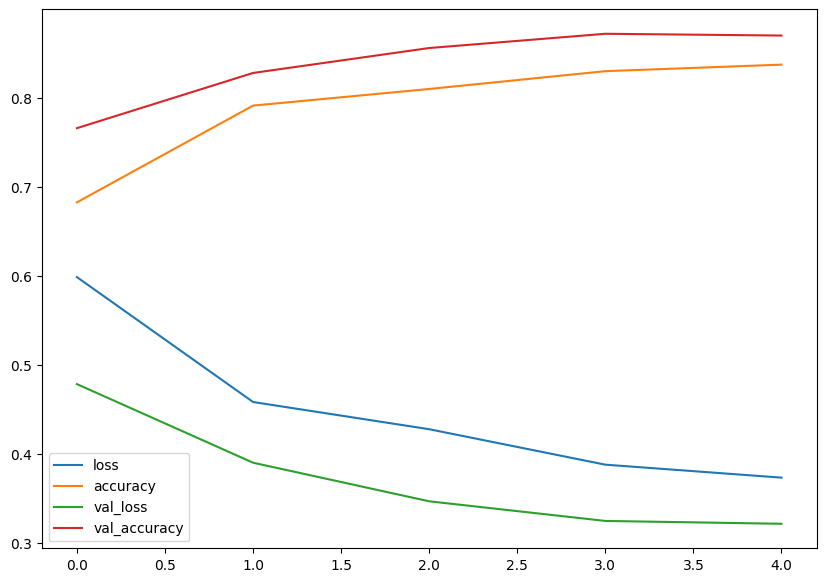

In [ ]:
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(10,7))

* Reducing overfitting is also known as regularization. we did this above using max pooling layer. It can also be done using Data Augmentation

# Data Augmentation

In [10]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
# Import data and augment it
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)

print("Unaugmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Unaugmented training data
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
                )

history_6  = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 429ms/step - loss: 0.7461 - accuracy: 0.4793 - val_loss: 0.6930 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6927 - accuracy: 0.4940 - val_loss: 0.6912 - val_accuracy: 0.5520
Epoch 3/5
47/47 [==============================] - 26s 556ms/step - loss: 0.6918 - accuracy: 0.5653 - val_loss: 0.6894 - val_accuracy: 0.5920
Epoch 4/5
47/47 [==============================] - 30s 635ms/step - loss: 0.6924 - accuracy: 0.5160 - val_loss: 0.6856 - val_accuracy: 0.5400
Epoch 5/5
47/47 [==============================] - 21s 431ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6825 - val_accuracy: 0.6900


** Above model will take longer becuase it is doing data augmentation on the fly

<Axes: >

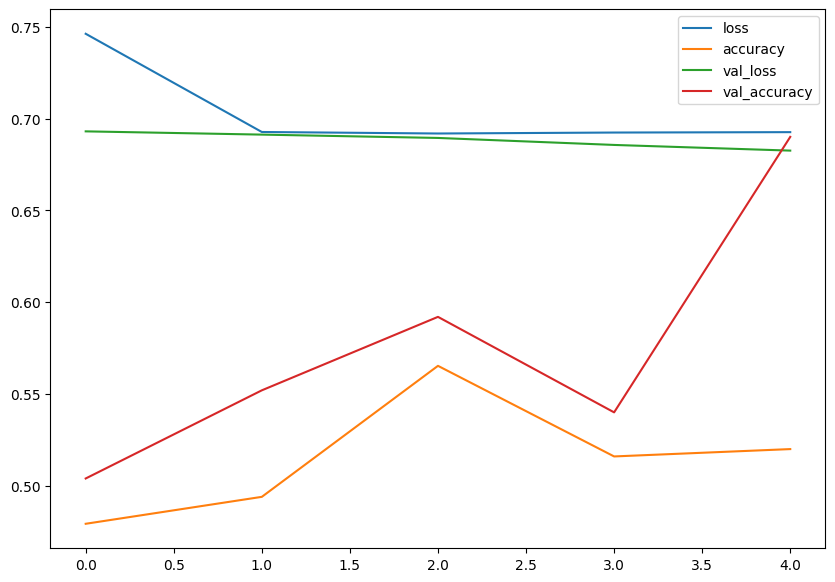

In [14]:
import pandas as pd
pd.DataFrame(history_6.history).plot(figsize=(10,7))

## Data augmentation with shuffling

In [15]:
# Augment the data with shuffling turned on
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=True)

model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
                )

history_7  = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data, validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6842 - accuracy: 0.6140 - val_loss: 0.6581 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 21s 444ms/step - loss: 0.6542 - accuracy: 0.6587 - val_loss: 0.5665 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6079 - accuracy: 0.6927 - val_loss: 0.5069 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5376 - accuracy: 0.7413 - val_loss: 0.3693 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 20s 420ms/step - loss: 0.4915 - accuracy: 0.7673 - val_loss: 0.3660 - val_accuracy: 0.8520


<Axes: >

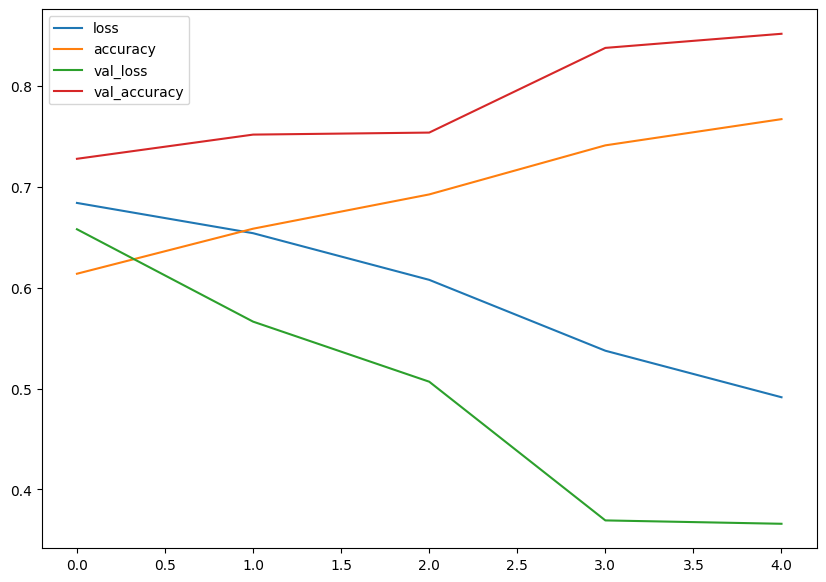

In [17]:
pd.DataFrame(history_7.history).plot(figsize=(10,7))

## After baseline, how to improve the model

1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer
8. USING TRANSFER LEARNING

In [18]:
# Build a CNN model (Tiny VGG)
vgg_model_8 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu"),
    MaxPool2D(pool_size=1,
              padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
    ])


# Compile the model
vgg_model_8.compile(loss="binary_crossentropy",
                    optimizer=Adam(),
                    metrics=["accuracy"])

# Fit the model
history_8 = vgg_model_8.fit(train_data_augmented,
                            epochs=5,
                            steps_per_epoch=len(train_data_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 528ms/step - loss: 0.7344 - accuracy: 0.5987 - val_loss: 0.4951 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 27s 577ms/step - loss: 0.5734 - accuracy: 0.7113 - val_loss: 0.4432 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6094 - accuracy: 0.6953 - val_loss: 0.5269 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5449 - accuracy: 0.7293 - val_loss: 0.4174 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 25s 525ms/step - loss: 0.4941 - accuracy: 0.7753 - val_loss: 0.3859 - val_accuracy: 0.8460


<Axes: >

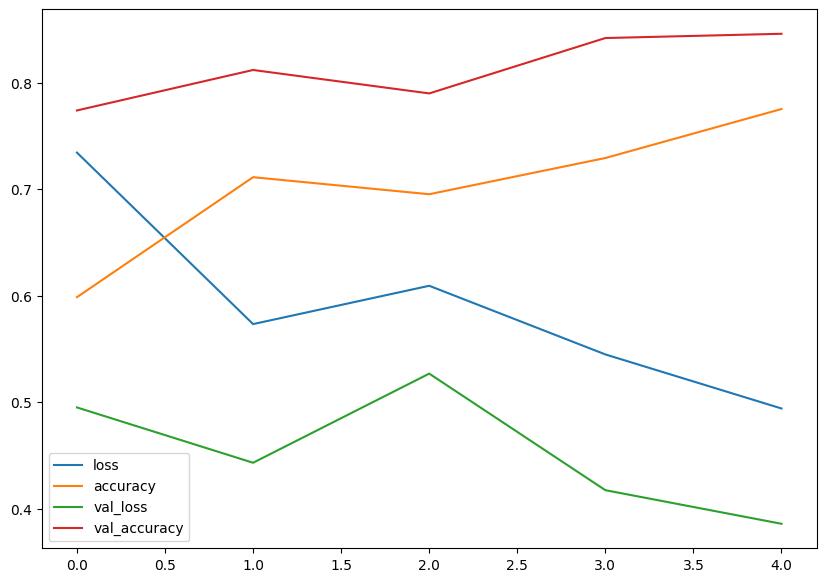

In [19]:
pd.DataFrame(history_8.history).plot(figsize=(10,7))

## Making predictions on custom images

In [35]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2024-02-23 19:20:05--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15442 (15K) [text/plain]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]  15.08K  --.-KB/s    in 0.03s   

2024-02-23 19:20:05 (603 KB/s) - ‘03-steak.jpeg’ saved [15442/15442]

